In [2]:
%matplotlib inline

import warnings
from text_unidecode import unidecode
from collections import deque
warnings.filterwarnings('ignore')


import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec

sns.set_style('whitegrid')
import csv
from matplotlib import pyplot
from imblearn.over_sampling import smote
import numpy as np
import os
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import scipy
#from plotly.offline import init_notebook_mode, iplot
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
#init_notebook_mode()
#make dummy variables

In [3]:
df = pd.read_csv('/Users/jermainemarshall/Documents/2018healthsurveyfiles/2018F&HDataforIFICtestagain.csv')
df.head(4)

,Degree,Race,BMI,REGION,Marital Status,Living_Area,Health_Insurance,importance_sustain_foods,Medical_cond,HouseHold_Income
0,4,1,2,4,1,2,2,3,6,3
1,6,1,1,2,2,2,2,4,6,3
2,5,1,2,2,1,3,2,4,13,1
3,3,1,1,3,4,1,2,2,13,1


In [4]:
df = pd.read_csv('/Users/jermainemarshall/Documents/2018healthsurveyfiles/2018F&HDataforIFICtestagain.csv')
df['user']= df.index
col = 'user' 
df = pd.concat([df[col],df.drop(col,axis=1)], axis=1)

df['Degree'] = df['Degree'].map({1:'Less than high school', 2:'high school',3:'Some college',4:'Associates degree', 5:'Bachelors', 6:'Graduate'})

df['Race'] = df['Race'].map({1:'White', 2:'Black',3:'Indian',4:'Asian', 5:'Hawaiian', 6:'Hispanic/Latino', 7:'Other'})

#df['BMI']= df['BMI'].map({1:'Normal', 2:'Overweight', 3:'Obese'}) #'NaN': 'Obese'})

#df['Gender']= df['Gender'].map({1:'Male', 2:'Female'})

df['REGION']= df['REGION'].map({1:'Northeast', 2: 'South', 3: 'West', 4:'Midwest'})



df['Marital Status']= df['Marital Status'].map({1:'Single', 2: 'Married', 3: 'Living w Partner', 4:'Divorced', 5:'Widowed', 6:'Other', 7:'Prefer not to say'})

df['Living_Area']= df['Living_Area'].map({1:'Rural', 2: 'Suburban', 3: 'Small town', 4:'Urban'})

df['Health_Insurance']= df['Health_Insurance'].map({1:'Yes', 2: 'No', 3: 'Prefer not to say'})


df['Medical_cond'] = df['Medical_cond'].map({1:'ADHD', 2:'Cancer',3:'Diabetes',4:'Cholesterol', 5:'Heart Disease', 6:'Blood Pressure', 7:'Obesity', 8:'Mobility',9:'Osteoporosis', 10:'Stroke', 11: 'Stress',12:'Dementia', 13: 'None'})

df['HouseHold_Income'] = df['HouseHold_Income'].map({1:'<35k', 2:'35k-50k',3:'50k-75k',4:'75k-100k', 5:'100k-150k', 6:'>150k', 7:'not sure', 8:'Didn’t Answer'})

df['importance_sustain_foods']= df['importance_sustain_foods'].map({1:'no impact', 2:'low-med', 3:'med', 4:'med-high', 5:'high'})
df.head(5)


,user,Degree,Race,BMI,REGION,Marital Status,Living_Area,Health_Insurance,importance_sustain_foods,Medical_cond,HouseHold_Income
0,0,Associates degree,White,2,Midwest,Single,Suburban,No,med,Blood Pressure,50k-75k
1,1,Graduate,White,1,South,Married,Suburban,No,med-high,Blood Pressure,50k-75k
2,2,Bachelors,White,2,South,Single,Small town,No,med-high,None,<35k
3,3,Some college,White,1,West,Divorced,Rural,No,low-med,None,<35k
4,4,high school,White,3,South,Divorced,Urban,No,med,Diabetes,50k-75k


In [6]:
df.to_csv('/Users/jermainemarshall/Documents/2018healthsurveyfiles/LabeledData.csv')

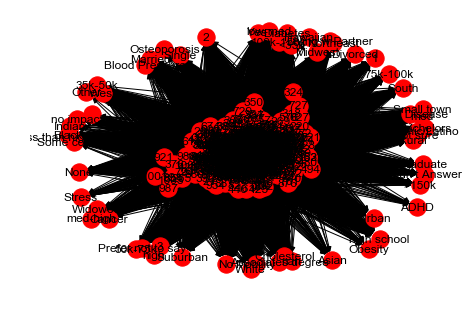

In [185]:
#df = pd.DataFrame(np.random.randn(2,4),columns=list('ABCD')) #Create a 4 column data frame
#df = pd.read_csv('/Users/jermainemarshall/Documents/testforhealthstuff.csv')
#df['user']= df.index
columns = list(df.columns.values)# Get columns name

g = nx.empty_graph(0, nx.DiGraph()) #initialize an empty graph

for i in range(len(columns)-1):
    g.add_edges_from(zip(df[columns[0]], df[columns[i+1]])) #Create edge between 2 values, between all consecutive coumns

# Plot it
nx.draw(g, with_labels=True)
plt.show()

In [186]:
g.edges

OutEdgeView([(0, 'Associates degree'), (0, 'White'), (0, '2'), (0, 'Midwest'), (0, 'Single'), (0, 'Suburban'), (0, 'No'), (0, 'med'), (0, 'Blood Pressure'), (0, '50k-75k'), (1, 'Graduate'), (1, 'White'), (1, '1'), (1, 'South'), (1, 'Married'), (1, 'Suburban'), (1, 'No'), (1, 'med-high'), (1, 'Blood Pressure'), (1, '50k-75k'), (2, 'Bachelors'), (2, 'White'), (2, '2'), (2, 'South'), (2, 'Single'), (2, 'Small town'), (2, 'No'), (2, 'med-high'), (2, 'None'), (2, '<35k'), (3, 'Some college'), (3, 'White'), (3, '1'), (3, 'West'), (3, 'Divorced'), (3, 'Rural'), (3, 'No'), (3, 'low-med'), (3, 'None'), (3, '<35k'), (4, 'high school'), (4, 'White'), (4, '3'), (4, 'South'), (4, 'Divorced'), (4, 'Urban'), (4, 'No'), (4, 'med'), (4, 'Diabetes'), (4, '50k-75k'), (5, 'high school'), (5, 'White'), (5, '1'), (5, 'Midwest'), (5, 'Married'), (5, 'Suburban'), (5, 'No'), (5, 'med-high'), (5, 'None'), (5, '50k-75k'), (6, 'high school'), (6, 'Black'), (6, '1'), (6, 'West'), (6, 'Single'), (6, 'Suburban'), (6

In [187]:
dtf = nx.to_pandas_edgelist(g)
dtf.head(60)

,source,target
0,0,Associates degree
1,0,White
2,0,2
3,0,Midwest
4,0,Single
5,0,Suburban
6,0,No
7,0,med
8,0,Blood Pressure
9,0,50k-75k


In [194]:
#dtf.to_csv('/Users/jermainemarshall/Documents/heteroalgorithms/edgelist_healthy.csv')
dtf.to_csv('/Users/jermainemarshall/Documents/heteroalgorithms/edgelist_healthy.csv', sep=' ', index=False)


In [188]:
node2vec = Node2Vec(g, dimensions=20, walk_length=16, num_walks=100, workers=2)
model = node2vec.fit(window=10, min_count=1)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

# Look for most similar nodes
model.wv.most_similar('2')

Computing transition probabilities: 100%|██████████| 1067/1067 [00:00<00:00, 7517.90it/s]


[('937', 0.7301536798477173),
 ('883', 0.6741960644721985),
 ('155', 0.6361411213874817),
 ('886', 0.6315387487411499),
 ('376', 0.5816211700439453),
 ('938', 0.5771546959877014),
 ('803', 0.5689178109169006),
 ('699', 0.5658143758773804),
 ('170', 0.5540093183517456),
 ('795', 0.5404007434844971)]

In [ ]:
#df = pd.read_csv('/Users/jermainemarshall/Documents/2018F&HDataforIFIC.csv')
def my_zip(d):
    t,w = d.iloc[0,0],d.iloc[0,1:]
    return pd.DataFrame(zip([t]*len(w), w)).dropna()

df = (pd.read_csv('/Users/jermainemarshall/Documents/2018F&HDataforIFIC.csv',header=None)
      .groupby(level=0)
      .apply(my_zip)
      #.reset_index(drop=True)
      #.rename_axis({0:'text',1:'word'},axis=1)
      )

In [189]:
model.wv.save_word2vec_format('/Users/jermainemarshall/Documents/2018healthsurveyfiles/testembed.csv')